# Presentation figures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

raw_data_path = './Raw Data/'

gaming = ['Gym Class', 'Gorilla Tag', 'Blaston']
education = ['Innerworld', 'ShapesXR', 'Zoe']
entertainment = ['RecRoom', 'VRPlayer', 'Ultimechs']

def trapezoid_method(df, power_column='power_wattage', time_column='Time Stamp'):
    return np.trapz(df[power_column].values, df[time_column].values)

def prepare_data(tmp, folder, run):
    tmp['power_voltage_in_volts'] = tmp['power_voltage'] / 1000.0
    tmp['power_voltage_in_amps'] = tmp['power_current'] / 1000.0
    tmp['total_power'] = tmp['power_voltage_in_volts'] * tmp['power_voltage_in_amps']
    tmp['TP_round'] = tmp['total_power'].round(2)

    total_records = len(tmp)
    total_time_minutes = 30
    time_between_records = total_time_minutes * 60 / total_records
    tmp['EC'] = (tmp['total_power'] * time_between_records).round(2)


    tmp['Time Stamp'] = tmp['Time Stamp'] // 1000
    tmp['Time Stamp'] = tmp['Time Stamp'] - tmp['Time Stamp'].min()

    tmp['energy_repl'] = trapezoid_method(tmp, 'TP_round', 'Time Stamp')
    tmp['energy'] = trapezoid_method(tmp, 'power_wattage', 'Time Stamp')
    
    tmp['Time Stamp'] = tmp['Time Stamp'] // 60
    tmp['power_wattage'] = tmp['power_wattage'] / 1000
    tmp['power'] = tmp['power_current'] * tmp['power_voltage'] / 1000000
    tmp['cpu_frequency_GHz'] = tmp['cpu_frequency_MHz'] / 1000
    tmp['gpu_frequency_GHz'] = tmp['gpu_frequency_MHz'] / 1000
    tmp['mem_frequency_GHz'] = tmp['mem_frequency_MHz'] / 1000
    tmp['app_vss_GB'] = tmp['app_vss_MB'] / 1024
    tmp['app_pss_GB'] = tmp['app_pss_MB'] / 1024
    tmp['timewarp_gpu_time_miliseconds'] = tmp['timewarp_gpu_time_microseconds'] / 1000
    if folder in gaming:
        tmp['genre'] = 'Gaming'
    elif folder in entertainment:
        tmp['genre'] = 'Entertainment'
    elif folder in education:
        tmp['genre'] = 'Education'
    else:
        tmp['genre'] = 'Unknown'
    tmp['app'] = folder
    tmp['run'] = run

    return tmp
    

def load_data(data_path = raw_data_path):
    data = pd.DataFrame()
    energy = pd.DataFrame()
    print('Loading data from ' + data_path)
    for folder in os.listdir(data_path):
        counter = 0
        for file in os.listdir(data_path + folder):
            if file.endswith('.csv'):
                tmp = pd.read_csv(data_path + folder + '/' + file)
                tmp = prepare_data(tmp, folder, counter)
                counter += 1
                data = pd.concat([data, tmp])
    return data

df = load_data()
df

Loading data from ./Raw Data/


Time Stamp  available_memory_MB  app_pss_MB  battery_level_percentage  \
0              0                 1954        1259                        30   
1              0                 1954        1259                        30   
2              0                 1954        1259                        30   
3              0                 1954        1259                        30   
4              0                 1954        1259                        30   
...          ...                  ...         ...                       ...   
1810          30                  995        2334                        51   
1811          30                  995        2334                        51   
1812          30                  995        2334                        51   
1813          30                  995        2334                        51   
1814          30                  995        2334                        51   

      battery_temperature_celcius  battery_current_now_milliamps  \
0                              45                           9999   
1                              45                           9999   
2                              45                           9999   
3                              45                           9999   
4                              45                           9999   
...                           ...                            ...   
1810                           45                           9999   
1811                           45                           9999   
1812                           45                           9999   
1813                           45                           9999   
1814                           45                           9999   

      sensor_temperature_celcius  power_current  power_level_state  \
0                              0           1312                  0   
1                              0           1500                  0   
2                              0           1500                  0   
3                              0           1500                  0   
4                              0           1483                  0   
...                          ...            ...                ...   
1810                           0           1500                  0   
1811                           0           1500                  0   
1812                           0           1500                  0   
1813                           0           1500                  0   
1814                           0           1500                  0   

      power_voltage  ...     power  cpu_frequency_GHz  gpu_frequency_GHz  \
0              3646  ...  4.783552              2.419              0.490   
1              3646  ...  5.469000              2.419              0.490   
2              3646  ...  5.469000              2.419              0.490   
3              3646  ...  5.469000              2.419              0.490   
4              3596  ...  5.332868              2.419              0.490   
...             ...  ...       ...                ...                ...   
1810           3703  ...  5.554500              1.478              0.525   
1811           3703  ...  5.554500              1.478              0.525   
1812           3703  ...  5.554500              1.478              0.525   
1813           3703  ...  5.554500              0.710              0.525   
1814           3718  ...  5.577000              0.940              0.525   

      mem_frequency_GHz  app_vss_GB  app_pss_GB  \
0                 1.555   12.901367    1.229492   
1                 1.353   12.901367    1.229492   
2                 2.000   12.901367    1.229492   
3                 2.000   12.901367    1.229492   
4                 2.000   12.901367    1.229492   
...                 ...         ...         ...   
1810              1.804   13.236328    2.279297   
1811              1.804   13.236328    2.279297   
1812              1.804   1

In [2]:
plt.rcParams['font.family'] = 'Arial'
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False,
                 "axes.spines.left": True,
                 "axes.spines.bottom": True,
                 "xtick.bottom": True,
                 "ytick.left": True,
                 "axes.edgecolor": "black",
                 "axes.grid": True,
                 "axes.linewidth": 1.5, 
                 "axes.facecolor": "white", 
                 "grid.color": "lightgray"}

custom_params_lineplot = {"axes.spines.right": True, 
                 "axes.spines.top": False,
                 "axes.spines.left": True,
                 "axes.spines.bottom": True,
                 "xtick.bottom": True,
                 "ytick.left": True,
                 "axes.edgecolor": "black",
                 "axes.grid": True,
                 "axes.linewidth": 1.5, 
                 "axes.facecolor": "white", 
                 "grid.color": "lightgray"}

custom_mean = {"marker":"d",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"7"}

custom_outliers = {'marker': 'o', 
                   'markerfacecolor': 'grey'}

sns.set_theme(style='whitegrid', rc=custom_params, font_scale=2)

In [3]:
for app in df['app'].unique():
  print(f'{app}', df[df['app'] == app]['TP_round'].describe())
  print()

Blaston count    5256.000000
mean        5.788387
std         0.371221
min         3.650000
25%         5.380000
50%         5.950000
75%         6.090000
max         6.310000
Name: TP_round, dtype: float64

Gorilla Tag count    5508.000000
mean        5.625728
std         0.317160
min         3.740000
25%         5.420000
50%         5.470000
75%         5.940000
max         6.320000
Name: TP_round, dtype: float64

Gym Class count    4549.000000
mean        5.588833
std         0.382840
min         3.510000
25%         5.490000
50%         5.600000
75%         5.790000
max         6.110000
Name: TP_round, dtype: float64

Innerworld count    6149.000000
mean        5.538099
std         0.262537
min         3.470000
25%         5.380000
50%         5.550000
75%         5.690000
max         6.320000
Name: TP_round, dtype: float64

RecRoom count    5212.000000
mean        5.405936
std         0.210006
min         3.670000
25%         5.410000
50%         5.470000
75%         5.510000
max 

In [4]:
energy_df = pd.DataFrame()
for genre in df['genre'].unique():
  for app in df['app'].unique():
    for run in range(3):
      energy = df[(df['app'] == app) & (df['run'] == run)]['energy_repl'].describe()['mean']
      temp = pd.DataFrame({'genre': genre, 'app': app, 'run': run, 'energy': energy}, index=[0])
      energy_df = pd.concat([energy_df, temp])

print(energy_df[energy_df['app'].isin(gaming)]['energy'].describe()['mean'])
print(energy_df[energy_df['app'].isin(education)]['energy'].describe()['mean'])
print(energy_df[energy_df['app'].isin(entertainment)]['energy'].describe()['mean'])

9859.735555555555
10616.328888888891
9230.82277777778


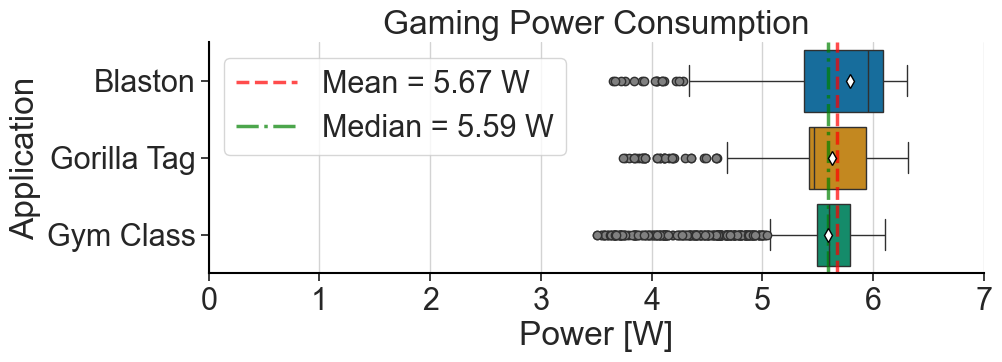

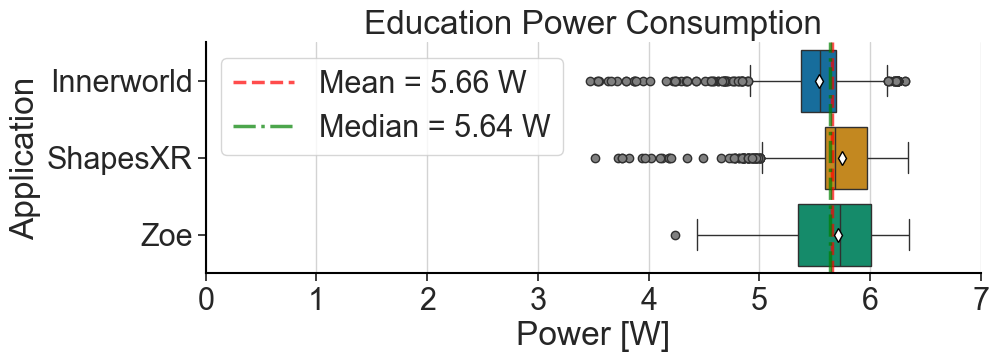

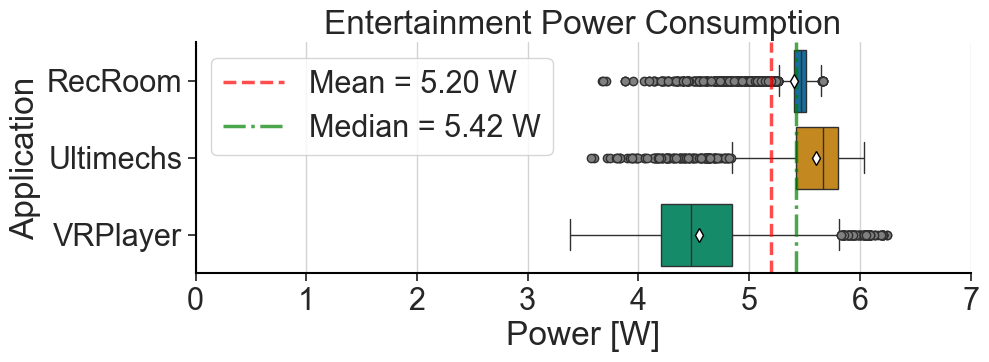

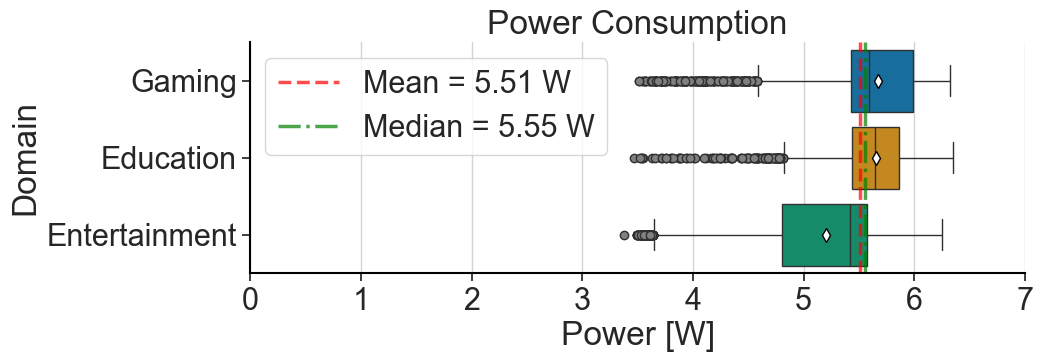

In [5]:

def boxplot(data, datapoint, app, title, limit=7):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    sns.boxplot(x=datapoint, y=app, data=data, showmeans=True, meanprops=custom_mean, flierprops=custom_outliers, palette='colorblind', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(datapoint)
    if title == 'Power Consumption':
        ax.set_ylabel('Domain')
    else:
        ax.set_ylabel('Application')
    ax.set_xlabel('Power [W]')
    ax.set_xlim(0, limit)
    # add vertical lines for the mean
    mean = data[datapoint].mean()
    median = data[datapoint].median()
    legend_elements = [ax.axvline(mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Mean = {mean:.2f} W'), 
                        ax.axvline(median, color='green', linestyle='-.', alpha=0.7, linewidth=2.5, label=f'Median = {median:.2f} W')]
    ax.legend(handles=legend_elements, loc='upper left')
    plt.show()

def lineplot(data, datapoint1, datapoint2, app, title, ylim_top=8):
    fig, ax = plt.subplots(1, 3, figsize=(18, 3))
    for i in range(3):
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y='power', palette='colorblind', ax=ax[i], color='green', alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel('Timestamp [min]')
        ax[i].set_ylabel('Power [W]')
        ax[i].set_ylim(0, 8)
        ax2 = ax[i].twinx()
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y=datapoint2, palette='colorblind', ax=ax2, color='red', alpha=0.5)
        ax2.set_ylim(0, ylim_top)
        if datapoint2 == 'cpu_frequency_GHz':
            ax2.set_ylabel('CPU Frequency [GHz]')
        elif datapoint2 == 'gpu_frequency_GHz':
            ax2.set_ylabel('GPU Frequency [GHz]')
        elif datapoint2 == 'mem_frequency_GHz':
            ax2.set_ylabel('Memory Frequency [GHz]')
        elif datapoint2 == 'cpu_utilization_percentage':
            ax2.set_ylabel('CPU Utilization [%]')
        elif datapoint2 == 'gpu_utilization_percentage':
            ax2.set_ylabel('GPU Utilization [%]')
        elif datapoint2 == 'app_pss_GB':
            ax2.set_ylabel('Storage [GB]')
        elif datapoint2 == 'app_vss_GB':
            ax2.set_ylabel('Memory [GB]')
        elif datapoint2 == 'timewarp_gpu_time_miliseconds':
            ax2.set_ylabel('Timewarp GPU Time [ms]')
        if i < 2: # <-- Only turn off the ticks for the first two subplots
            ax2.set_ylabel(None)
        if i > 0:
            ax[i].set_ylabel(None)
    plt.show()


boxplot(df[df['app'].isin(gaming)], 'TP_round', 'app', 'Gaming Power Consumption')
boxplot(df[df['app'].isin(education)], 'TP_round', 'app', 'Education Power Consumption')
boxplot(df[df['app'].isin(entertainment)], 'TP_round', 'app', 'Entertainment Power Consumption')
boxplot(df, 'TP_round', 'genre', 'Power Consumption')

In [9]:
# calculate energy consumption per application
pows = df.groupby(['genre', 'app', 'run'])['power'].sum().reset_index()
# pows = pows.groupby(['genre', 'app'])['power'].mean().reset_index()
# pows = pows.groupby('genre')['power'].mean().reset_index()
pows

df.groupby('genre')['EC'].describe()
#boxplot(df, 'EC', 'genre', 'Power Consumption', 10)

from cliffs_delta import cliffs_delta

d, res = cliffs_delta(df[df['genre'] == 'Education']['EC'], df[df['genre'] == 'Entertainment']['EC'])
print(f'Education vs Entertainment: {d}, {res}')

d, res = cliffs_delta(df[df['genre'] == 'Entertainment']['EC'], df[df['genre'] == 'Gaming']['EC'])
print(f'Entertainment vs Gaming: {d}, {res}')

d, res = cliffs_delta(df[df['genre'] == 'Education']['EC'], df[df['genre'] == 'Gaming']['EC'])
print(f'Education vs Gaming: {d}, {res}')


Education vs Entertainment: 0.15947188975363794, small
Entertainment vs Gaming: -0.42218655974768904, medium
Education vs Gaming: -0.26673060538042315, small


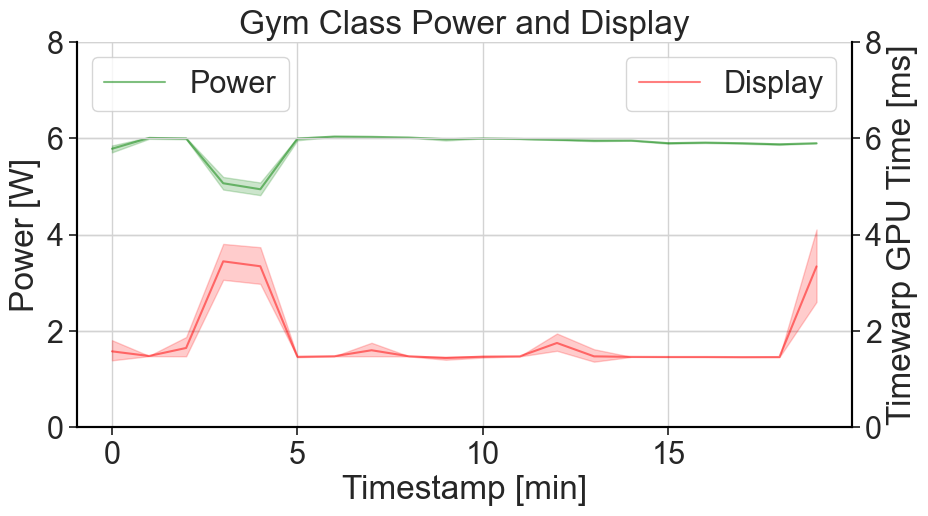

In [174]:
sns.set_theme(style='whitegrid', rc=custom_params_lineplot, font_scale=2)

def single_lineplot(data, datapoint1, datapoint2, app, run, title, ylim_top=8, position='lower'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(data=data[(data['app'] == app) & (data['run'] == run)], x='Time Stamp', y=datapoint1, palette='colorblind', ax=ax, color='green', alpha=0.5, label='Power')
    ax.set_title(title)
    ax.set_xlabel('Timestamp [min]')
    ax.set_ylabel('Power [W]')
    ax.set_ylim(0, 8)
    ax.legend(loc=f'{position} left')
    ax2 = ax.twinx()
    sns.lineplot(data=data[(data['app'] == app) & (data['run'] == run)], x='Time Stamp', y=datapoint2, palette='colorblind', ax=ax2, color='red', alpha=0.5, label=title.split(' ')[-1])
    ax2.set_ylim(0, ylim_top)
    if datapoint2 == 'cpu_frequency_GHz':
        ax2.set_ylabel('CPU Frequency [GHz]')
    elif datapoint2 == 'gpu_frequency_GHz':
        ax2.set_ylabel('GPU Frequency [GHz]')
    elif datapoint2 == 'mem_frequency_GHz':
        ax2.set_ylabel('Memory Frequency [GHz]')
    elif datapoint2 == 'cpu_utilization_percentage':
        ax2.set_ylabel('CPU Utilization [%]')
    elif datapoint2 == 'gpu_utilization_percentage':
        ax2.set_ylabel('GPU Utilization [%]')
    elif datapoint2 == 'app_pss_GB':
        ax2.set_ylabel('Storage [GB]')
    elif datapoint2 == 'app_vss_GB':
        ax2.set_ylabel('Memory [GB]')
    elif datapoint2 == 'timewarp_gpu_time_miliseconds':
        ax2.set_ylabel('Timewarp GPU Time [ms]')
    ax2.legend(loc=f'{position} right')
    # fig.legend()

single_lineplot(df, 'power', 'timewarp_gpu_time_miliseconds', 'Gym Class', 1, 'Gym Class Power and Display', 8, 'upper')

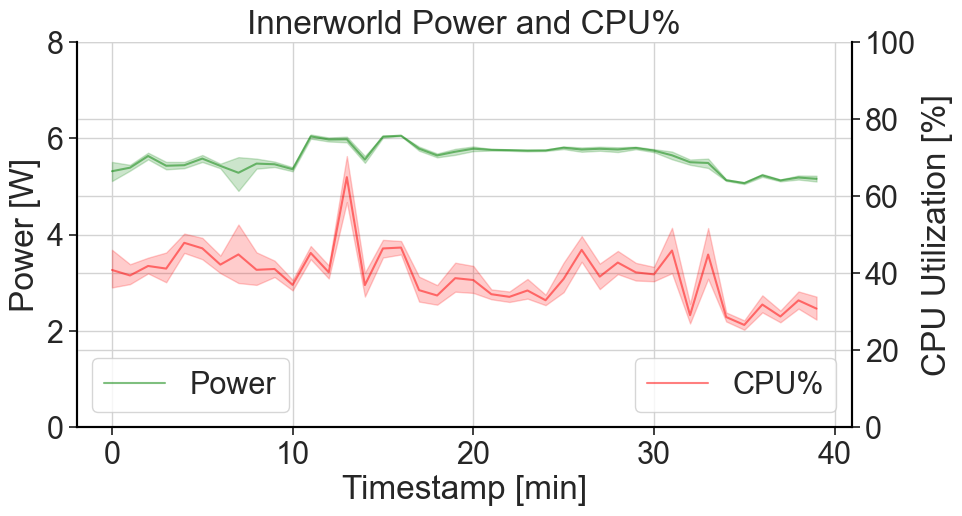

In [175]:
single_lineplot(df, 'power', 'cpu_utilization_percentage', 'Innerworld', 0, 'Innerworld Power and CPU%', 100, 'lower')

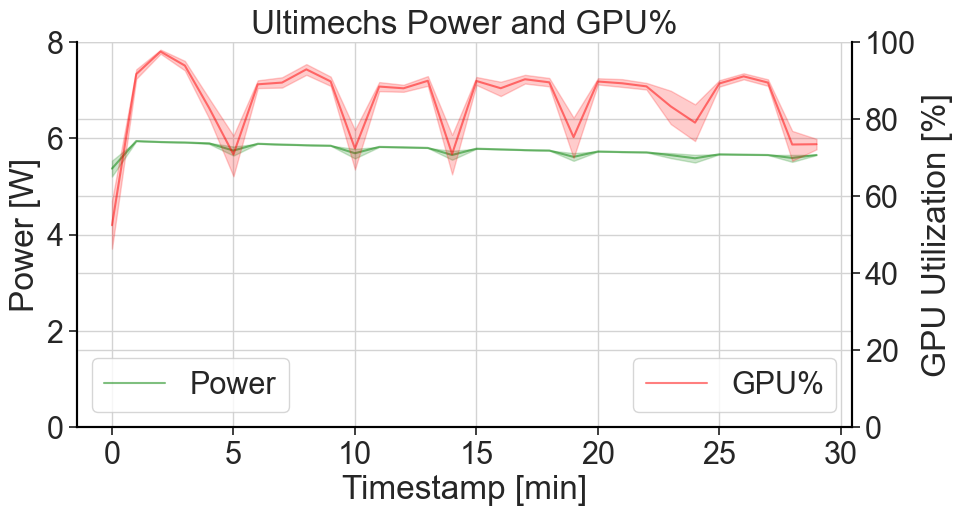

In [176]:
single_lineplot(df, 'power', 'gpu_utilization_percentage', 'Ultimechs', 0, 'Ultimechs Power and GPU%', 100, 'lower')

# Many graphs

## CPU Utilisation

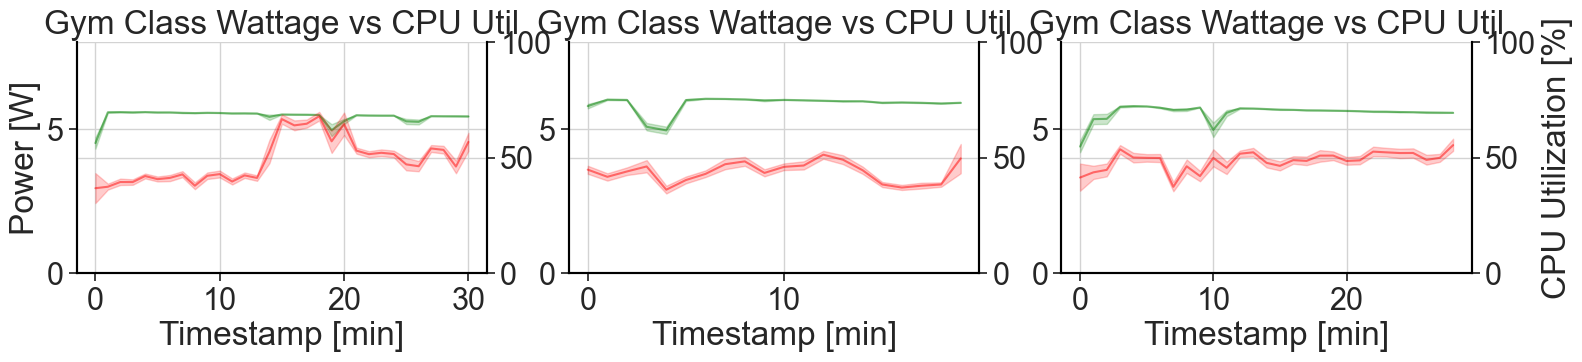

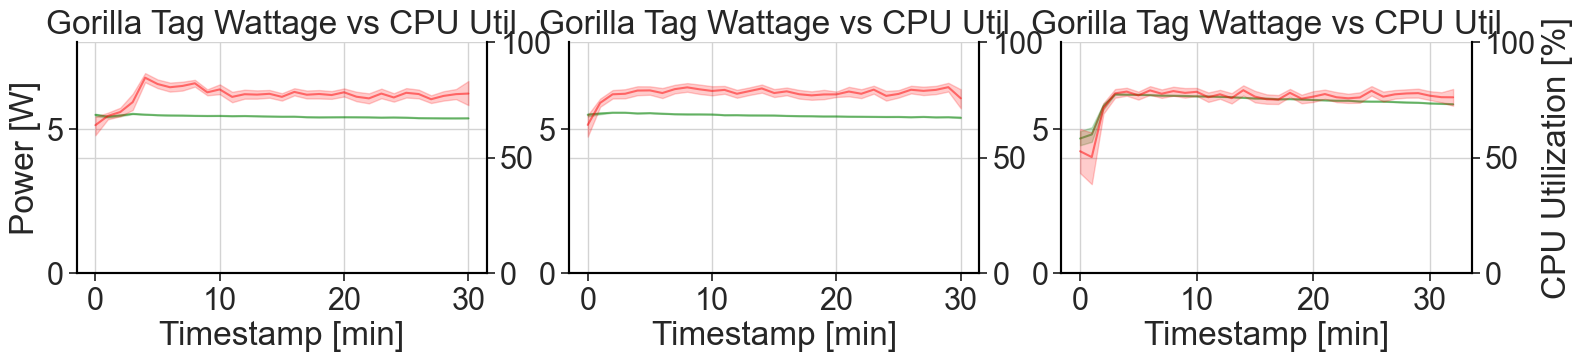

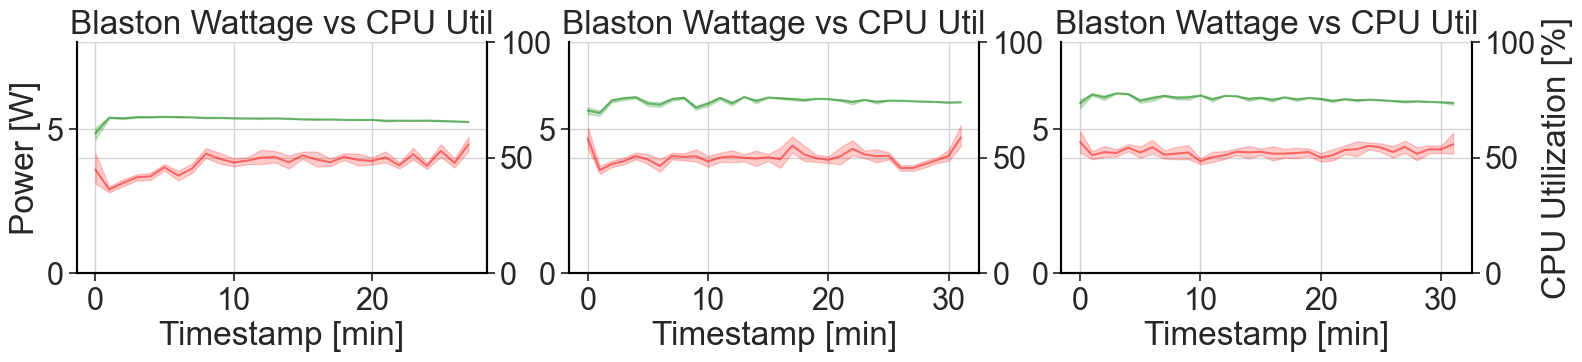

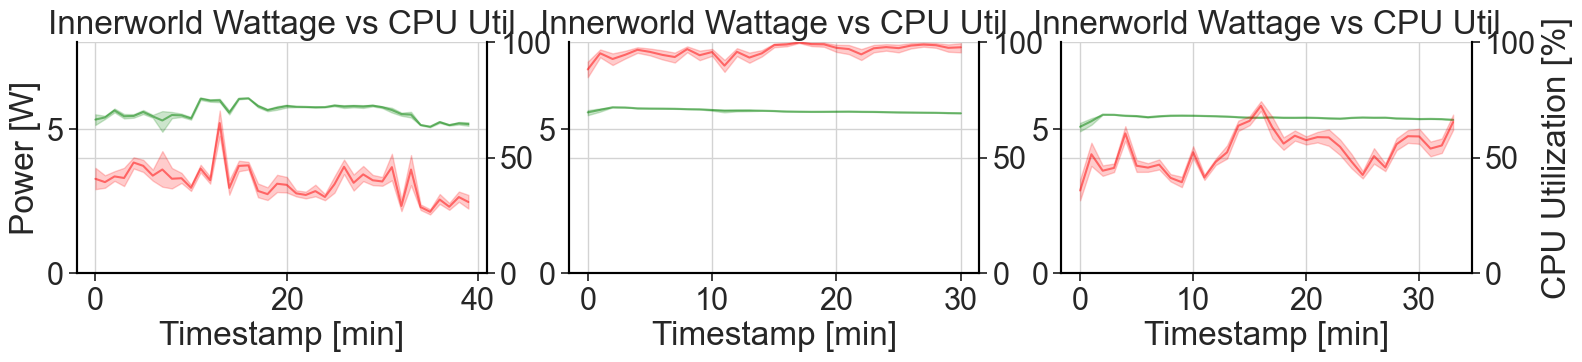

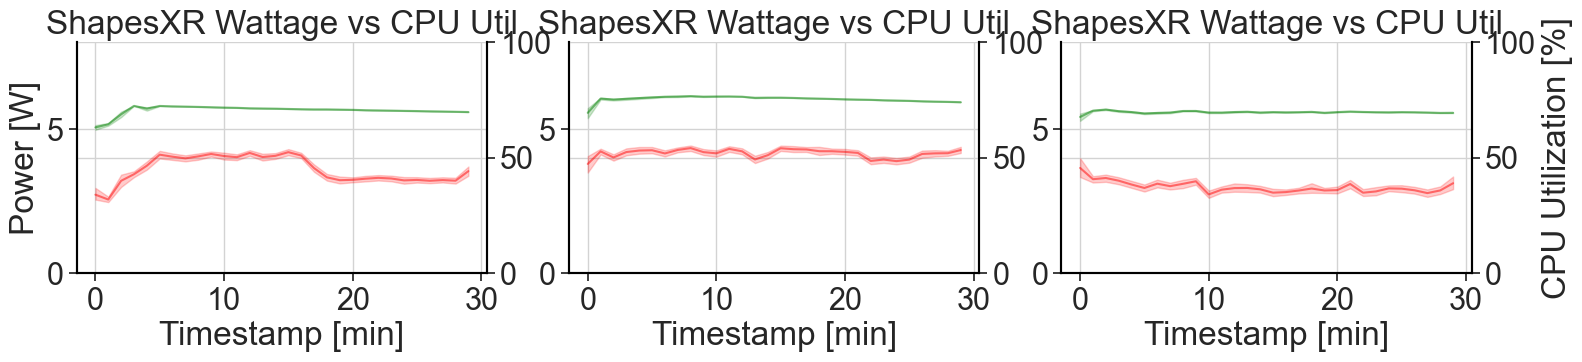

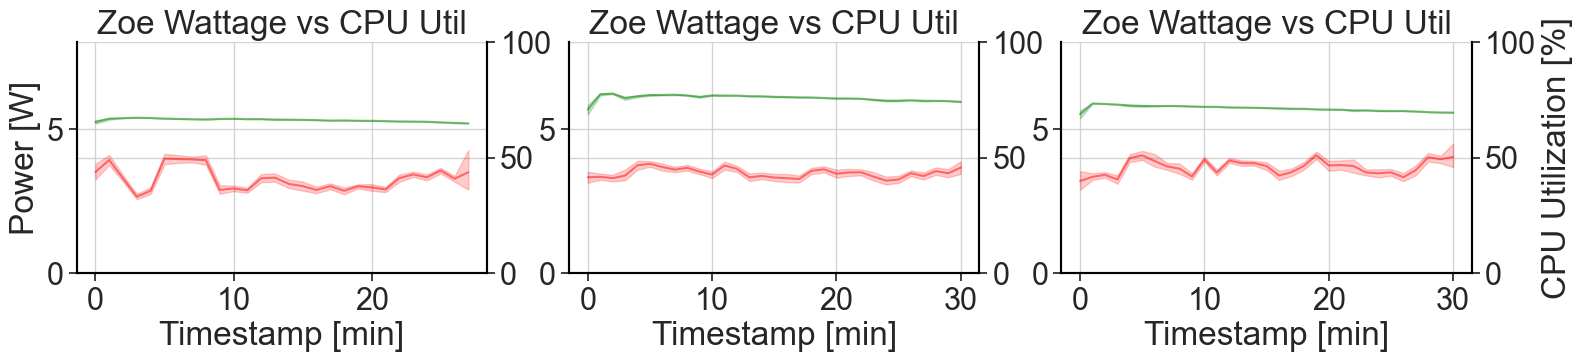

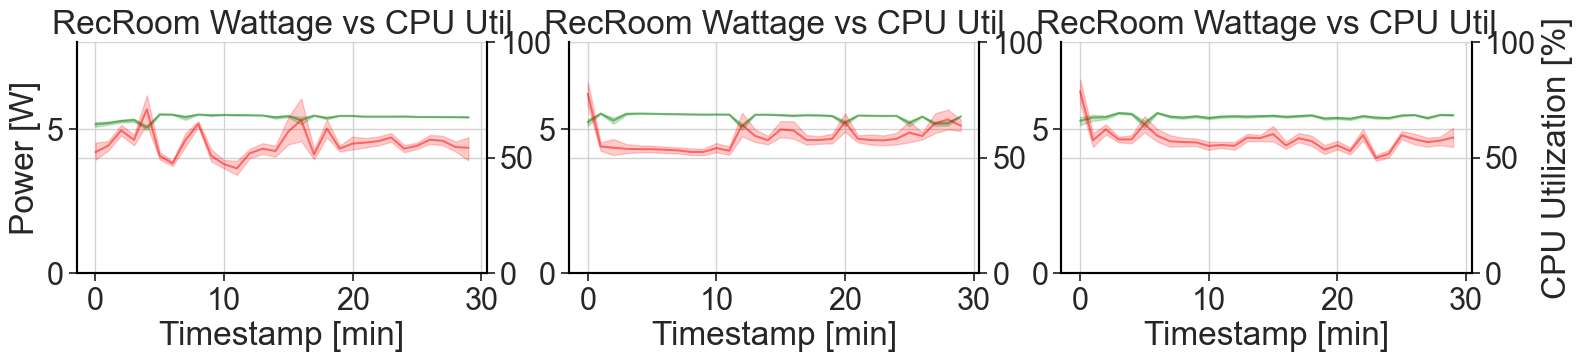

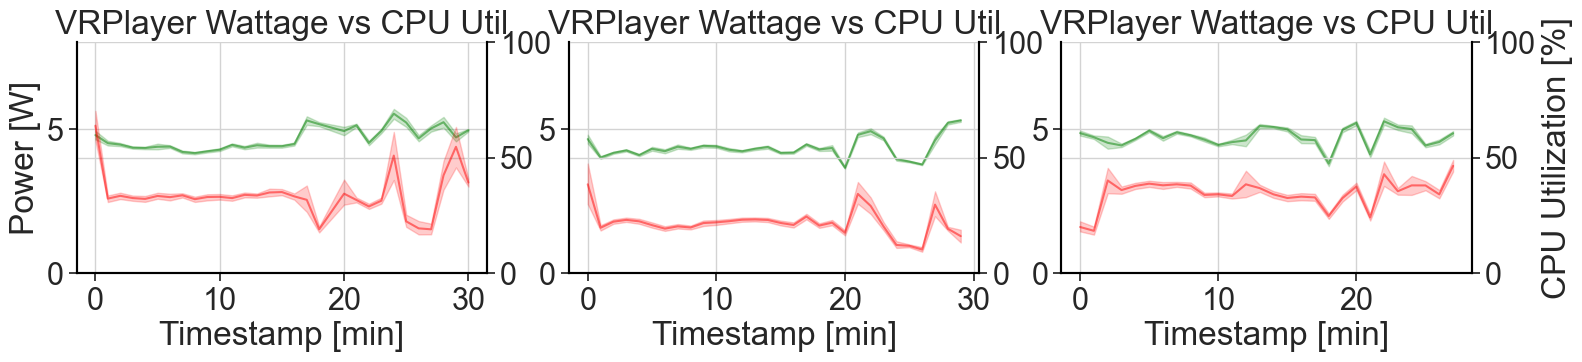

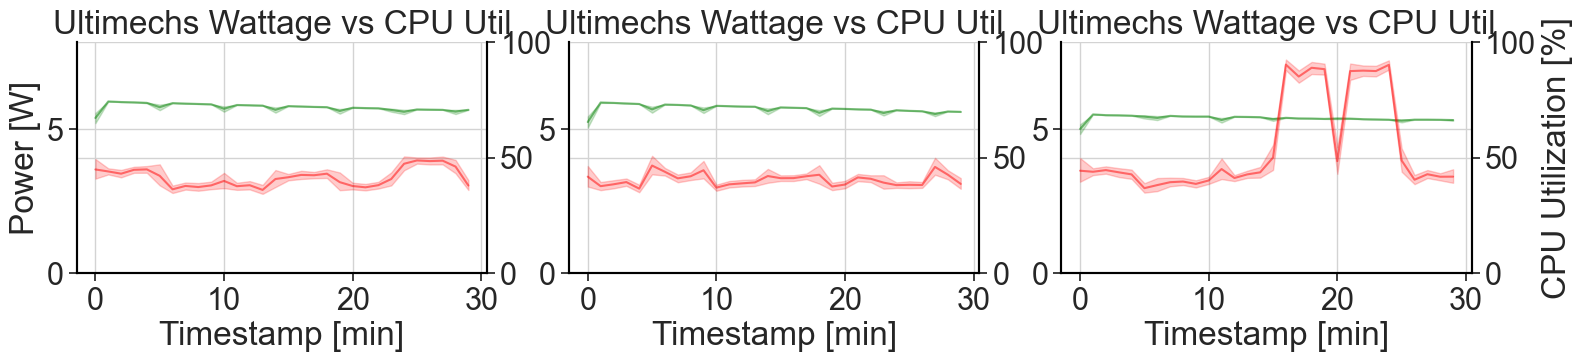

In [166]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power', 'cpu_utilization_percentage', app, app + ' Wattage vs CPU Util', 100)


## GPU Utilisation

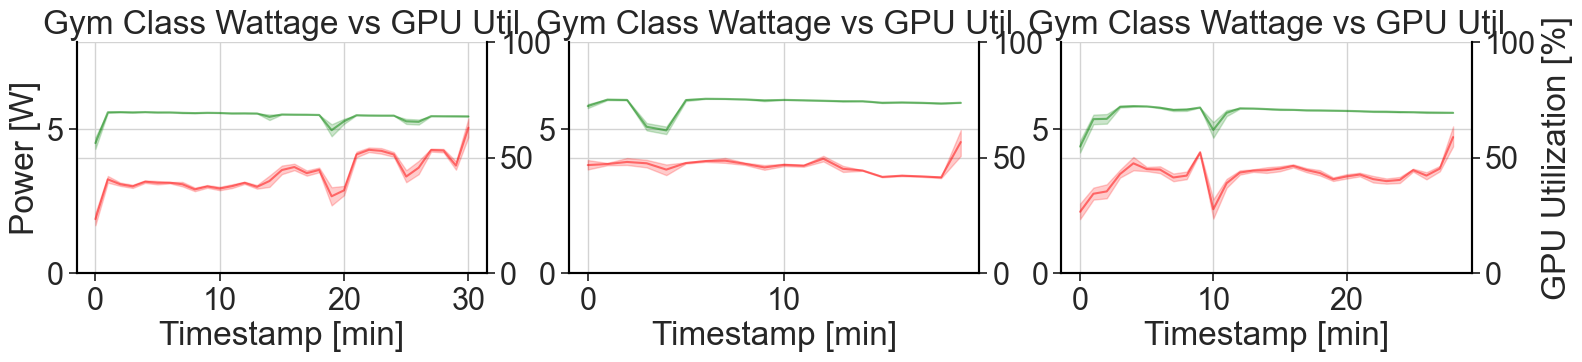

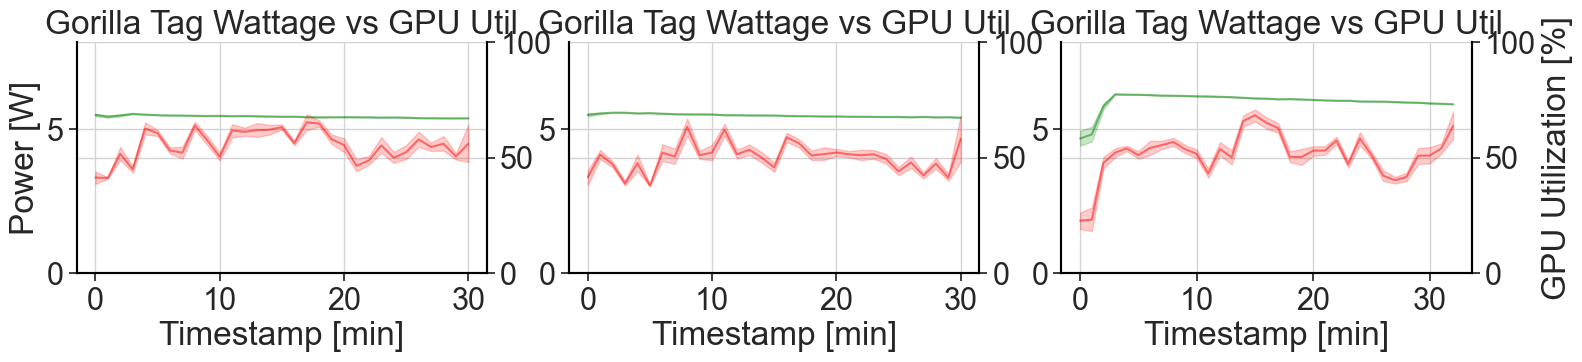

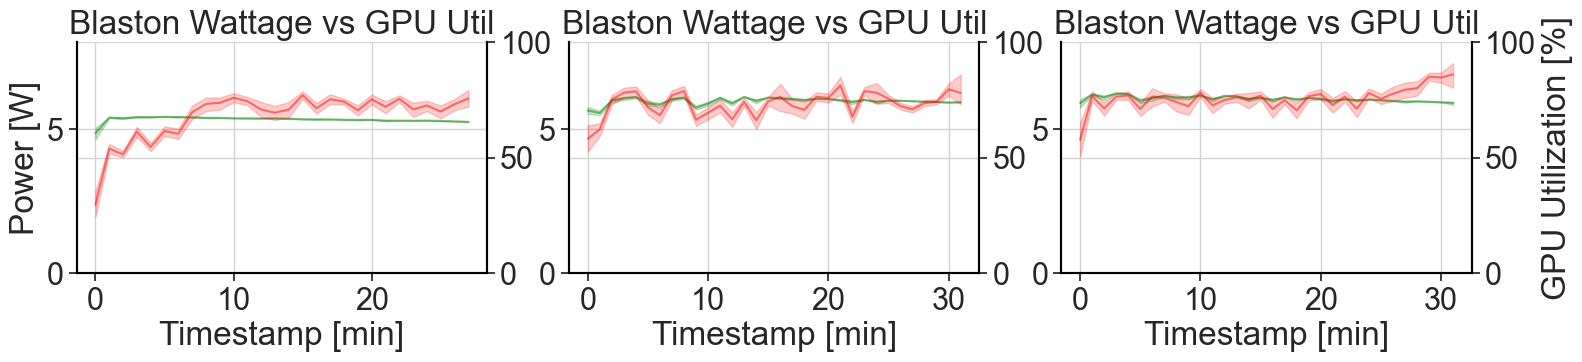

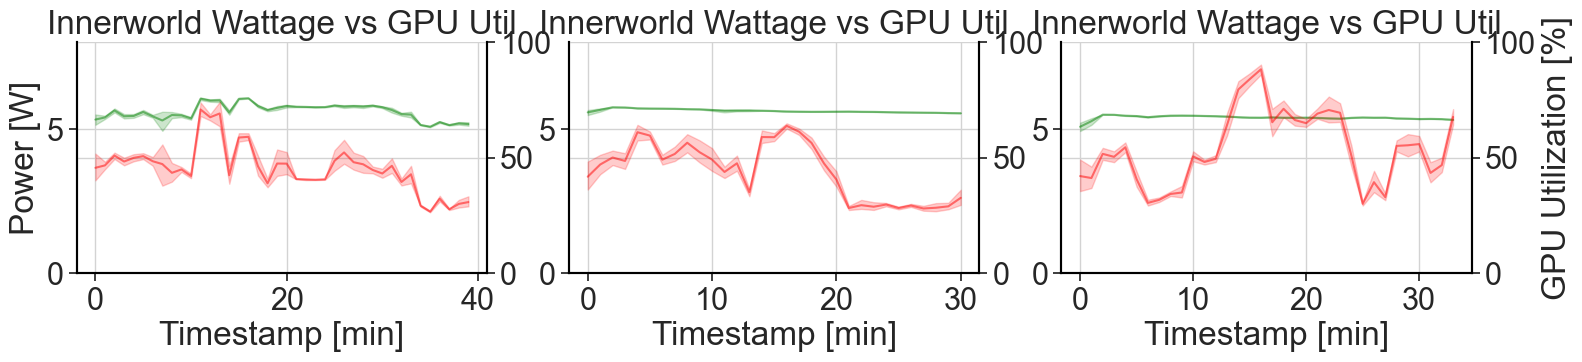

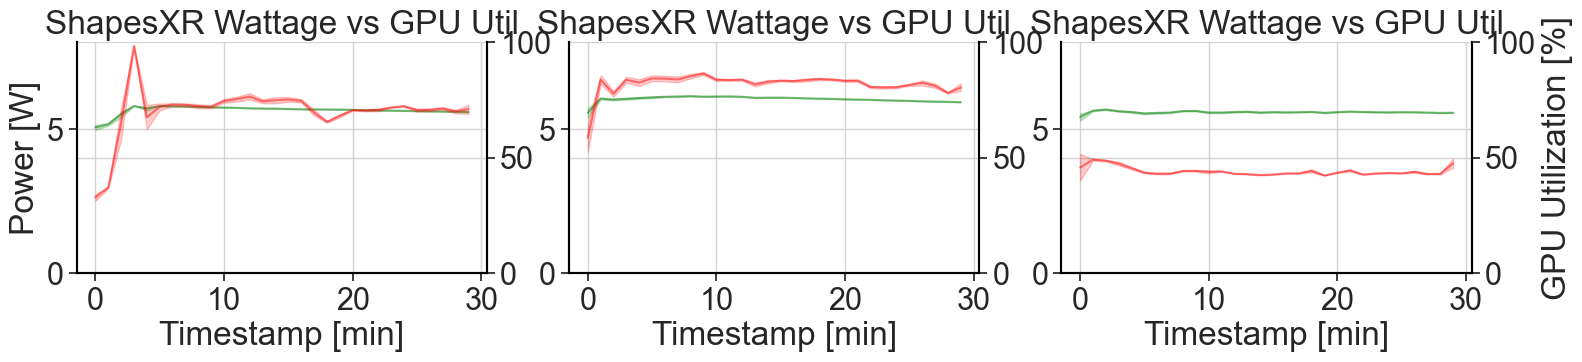

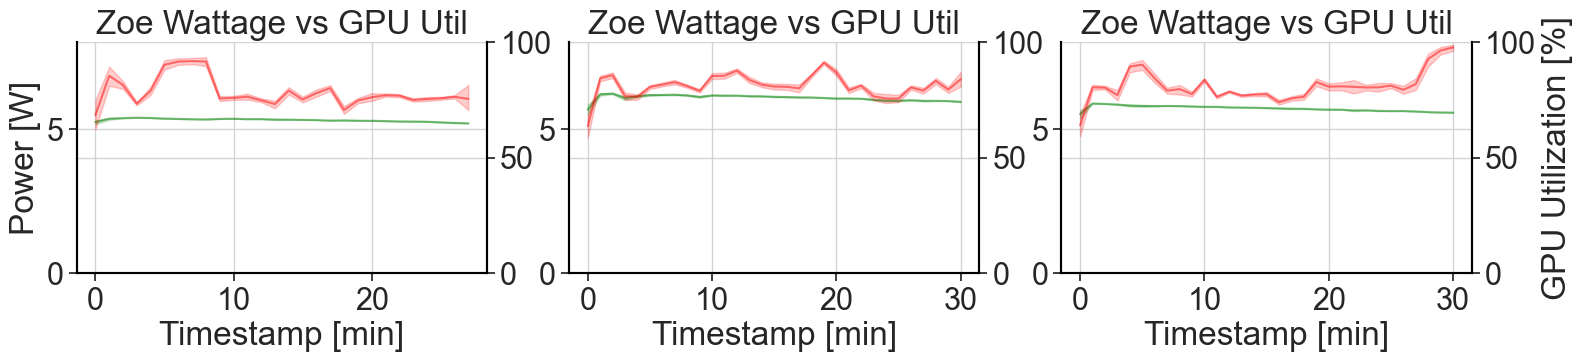

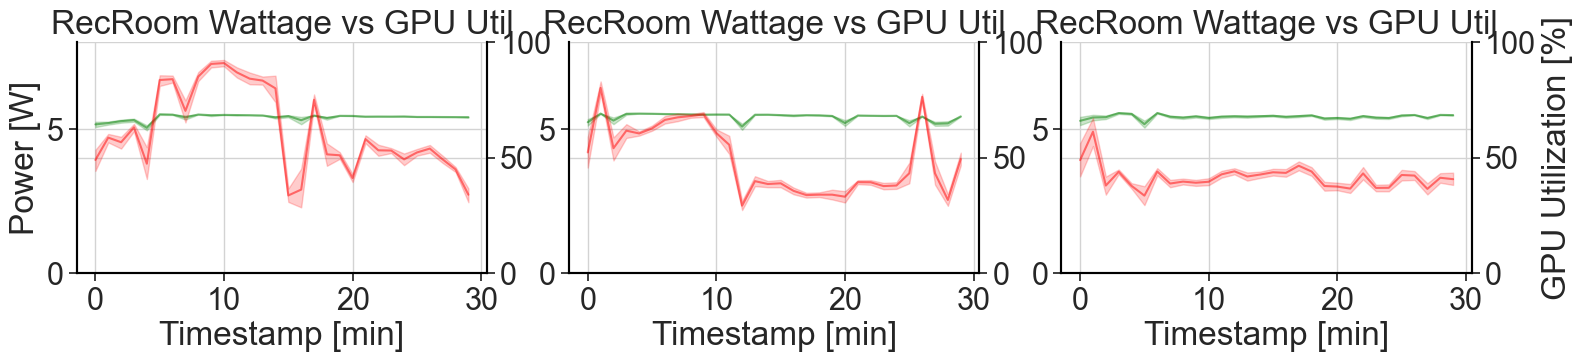

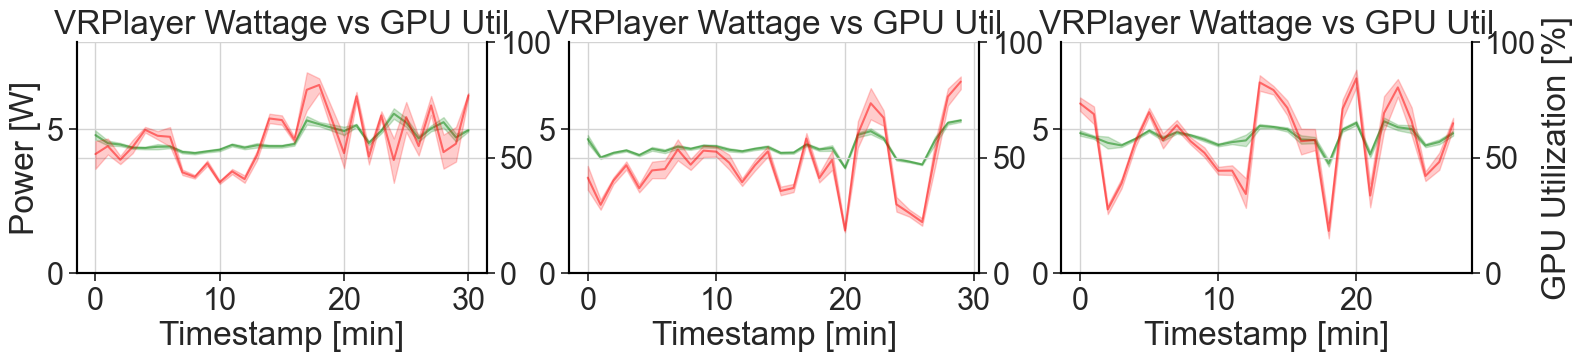

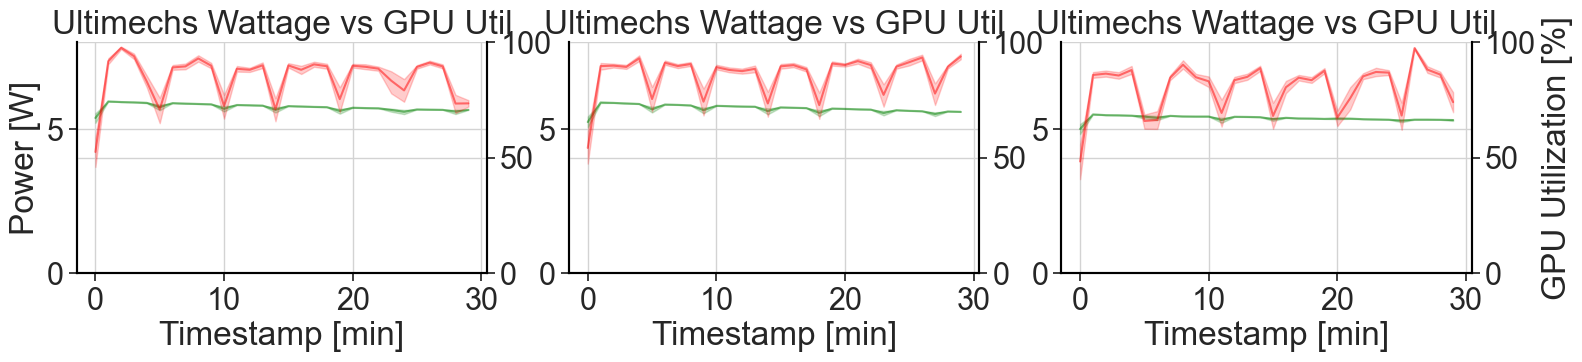

In [167]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power', 'gpu_utilization_percentage', app, app + ' Wattage vs GPU Util', 100)

## Display

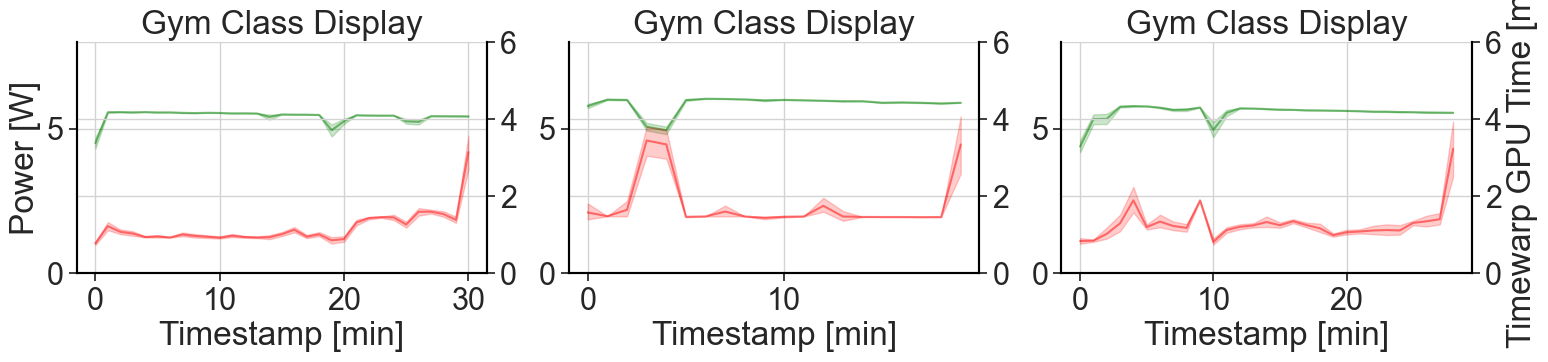

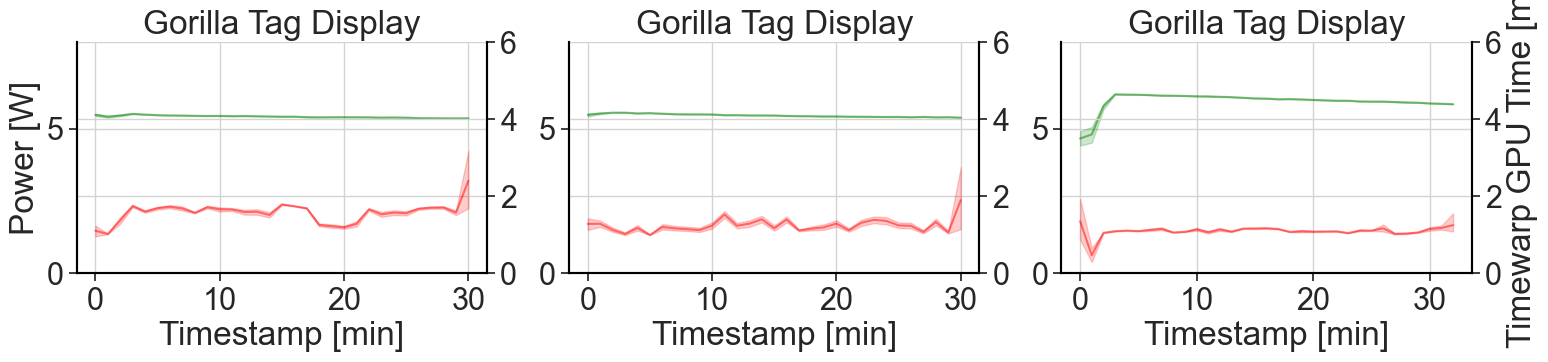

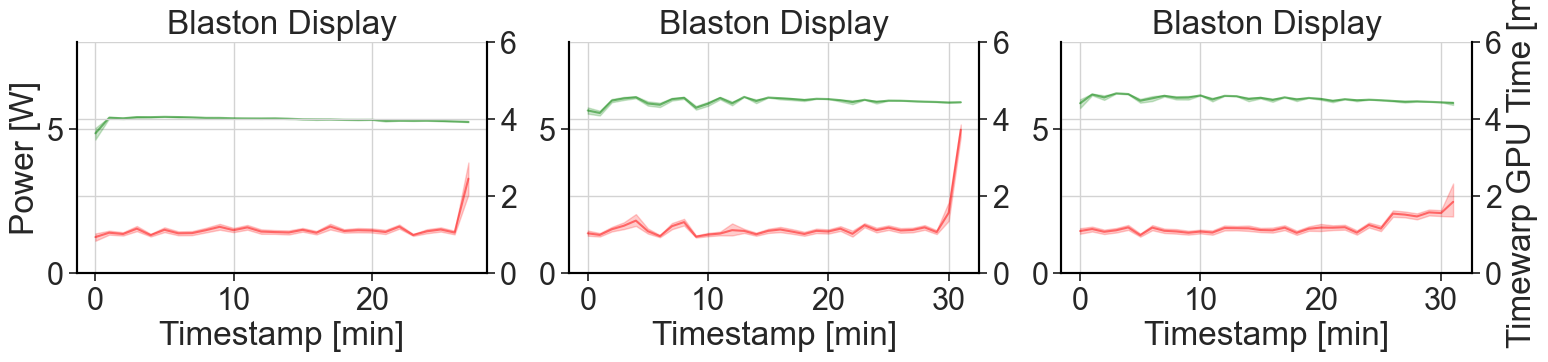

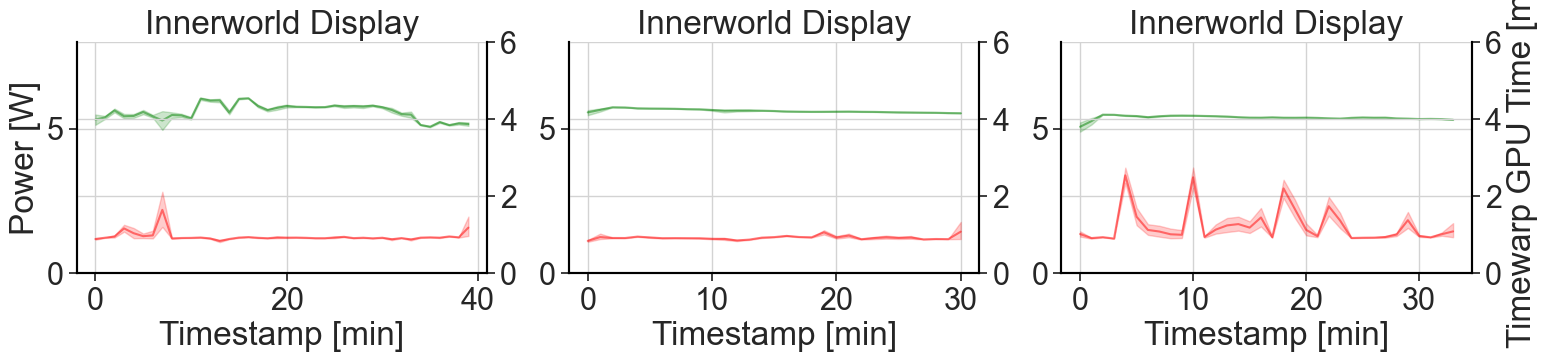

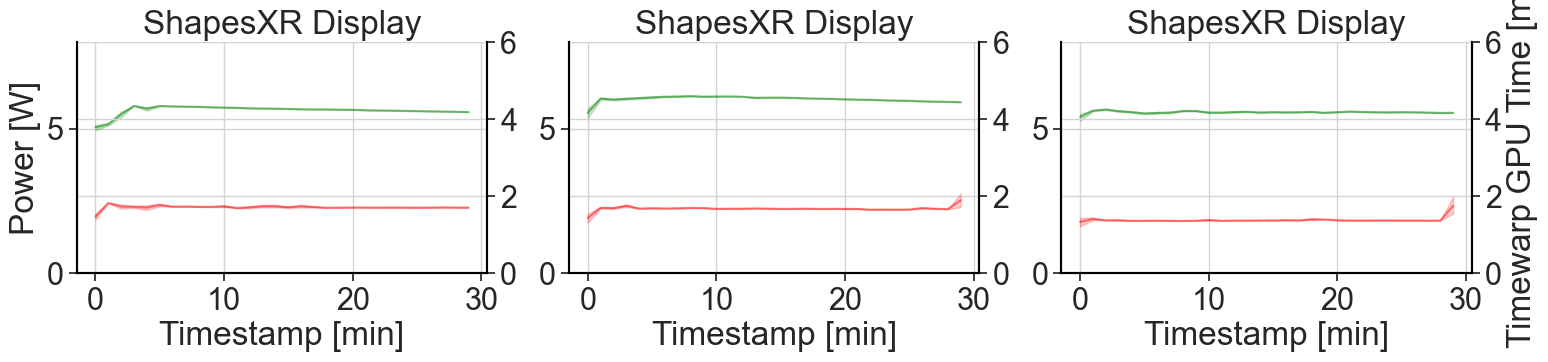

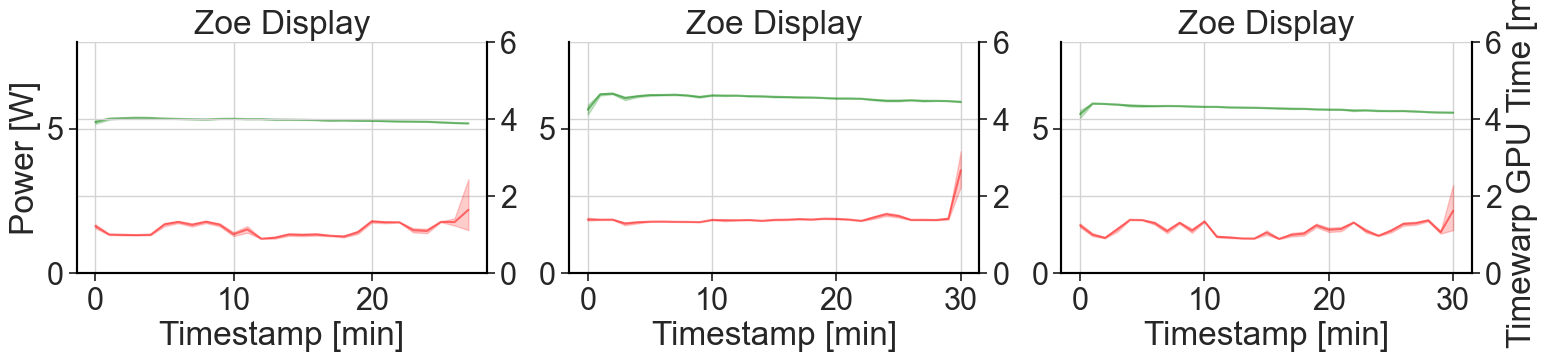

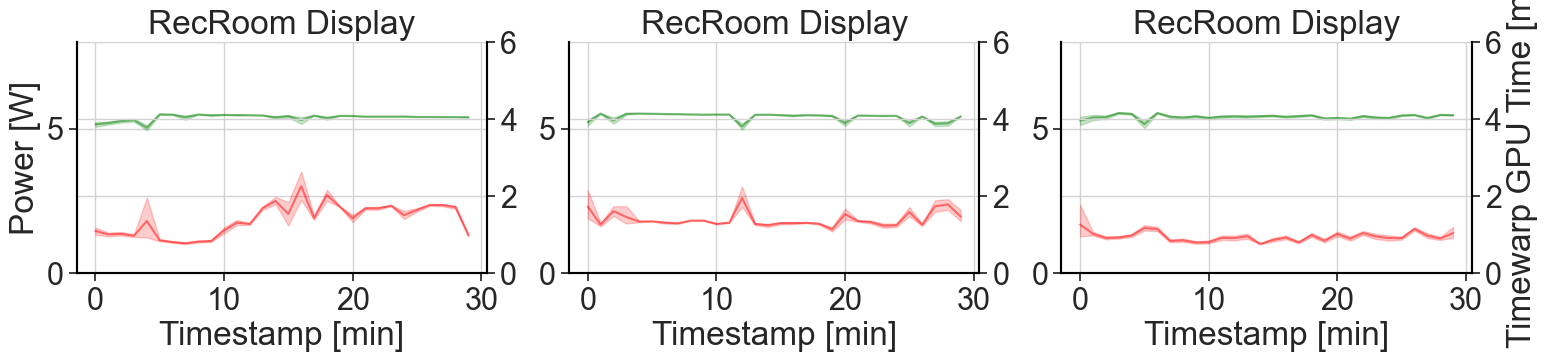

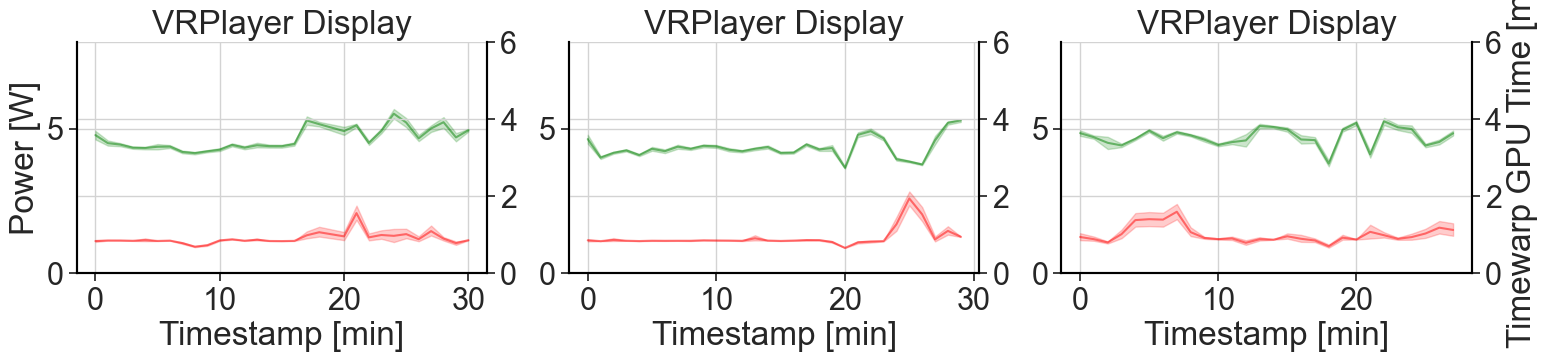

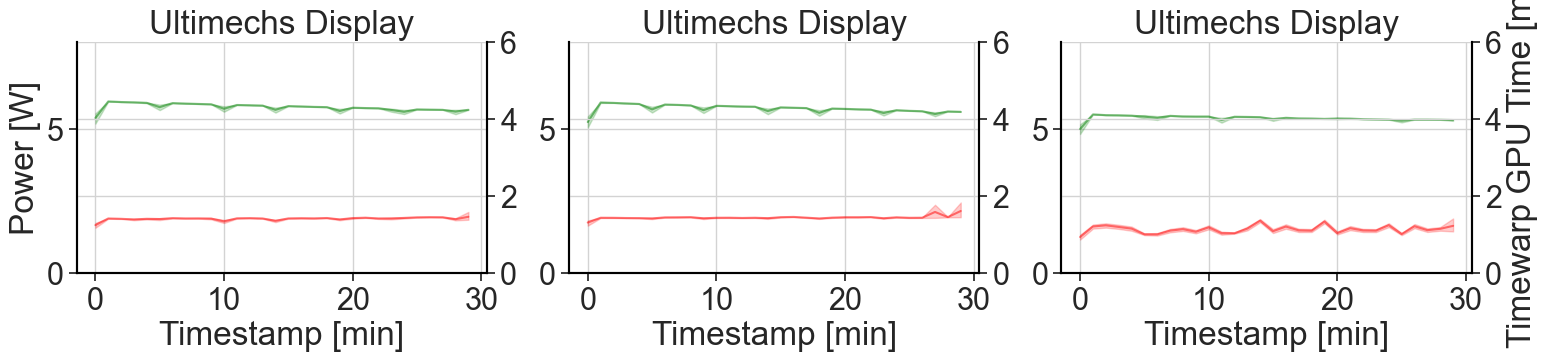

In [168]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power', 'timewarp_gpu_time_miliseconds', app, app + ' Display', 6)


## Storage

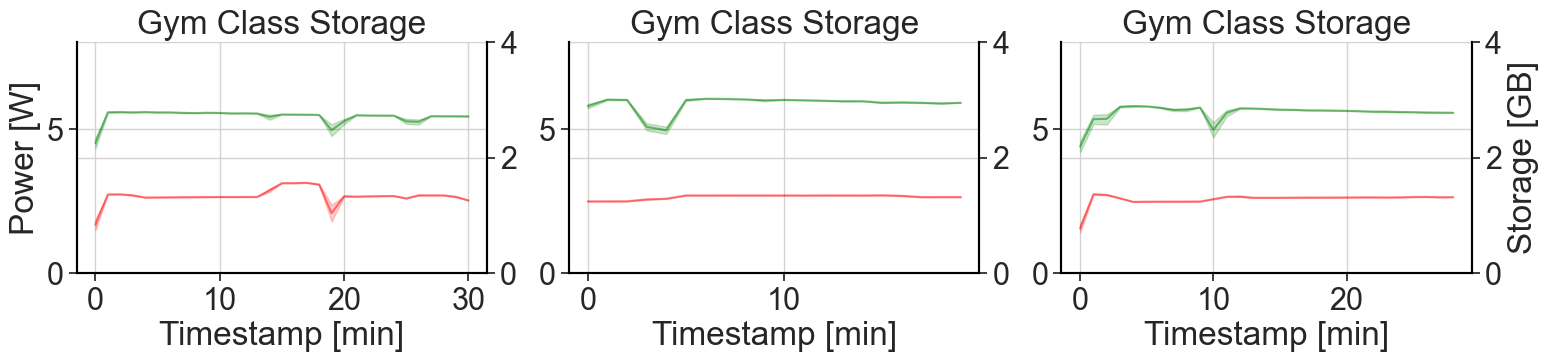

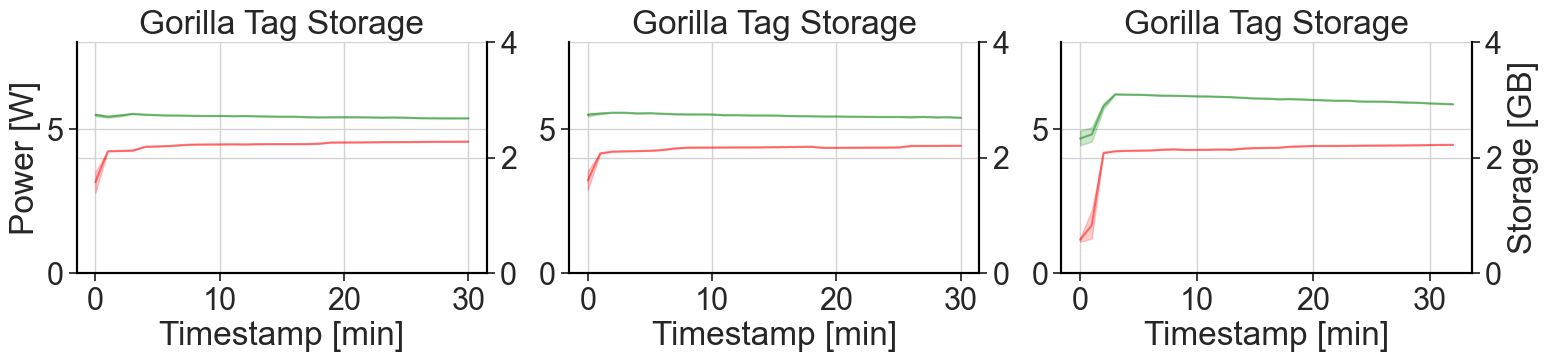

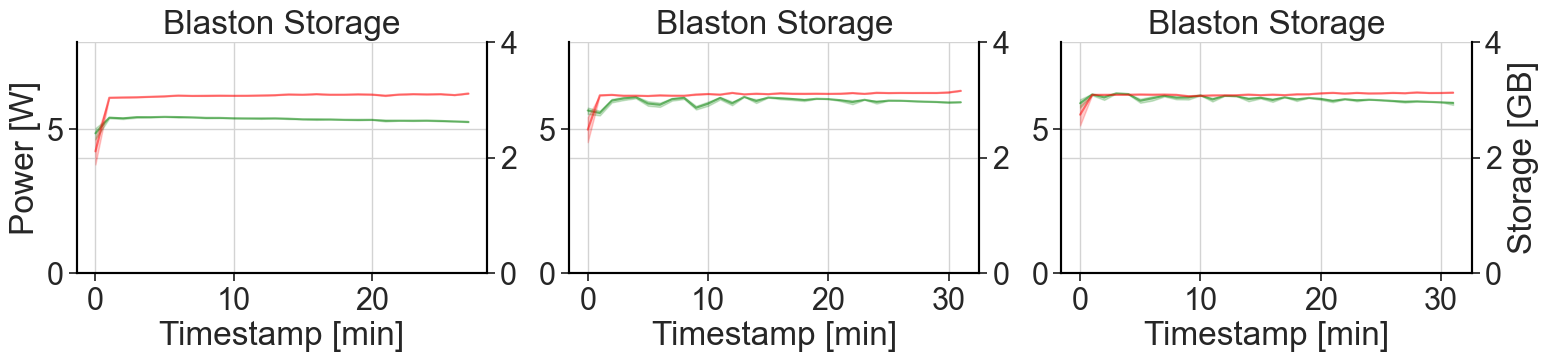

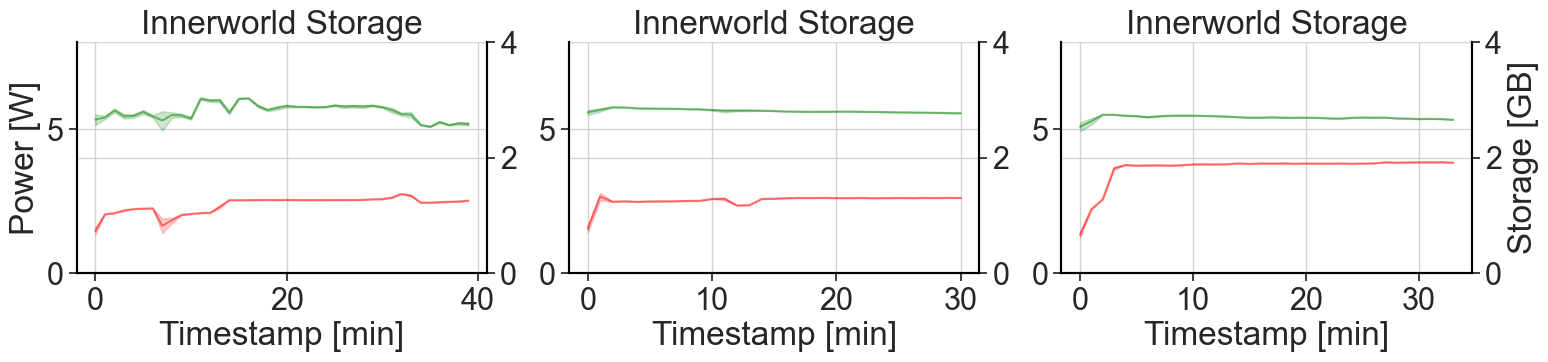

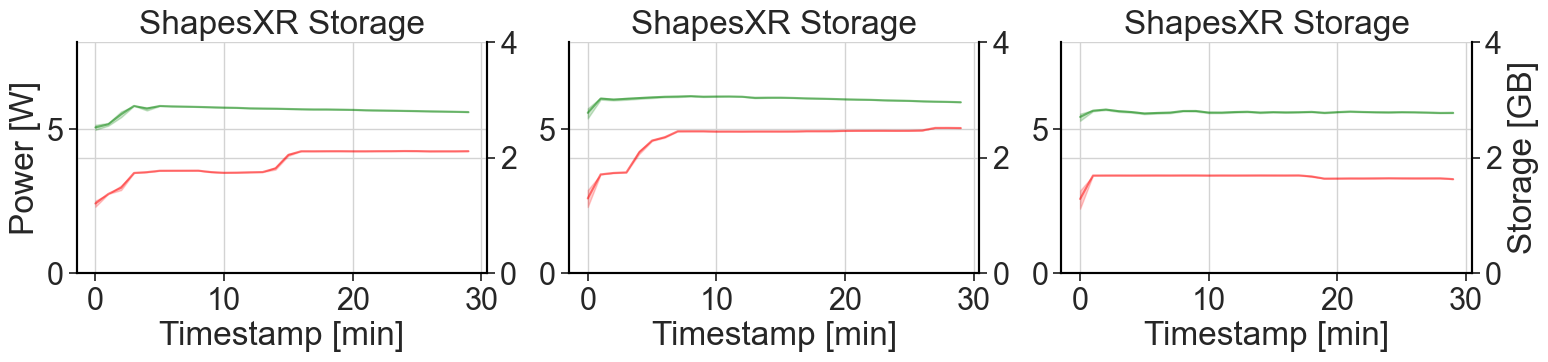

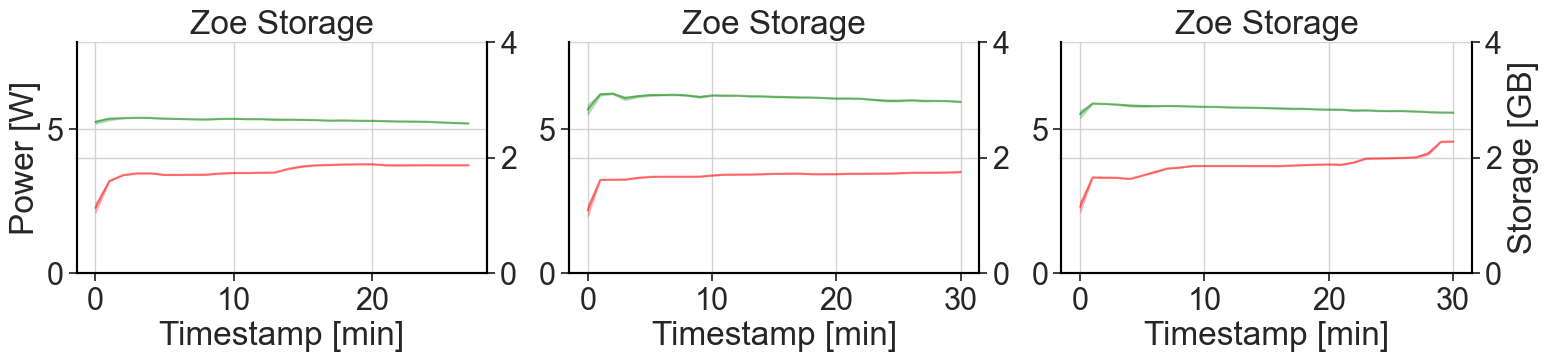

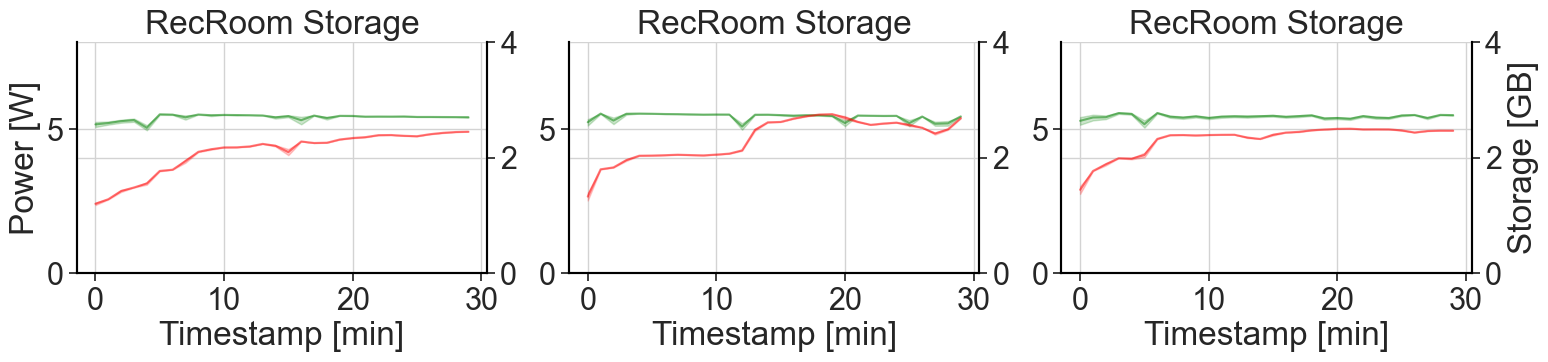

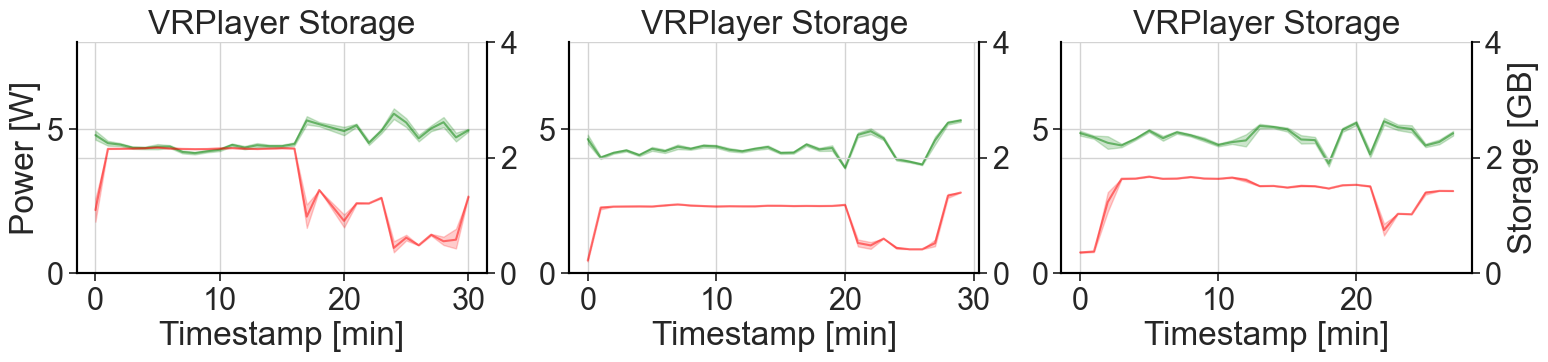

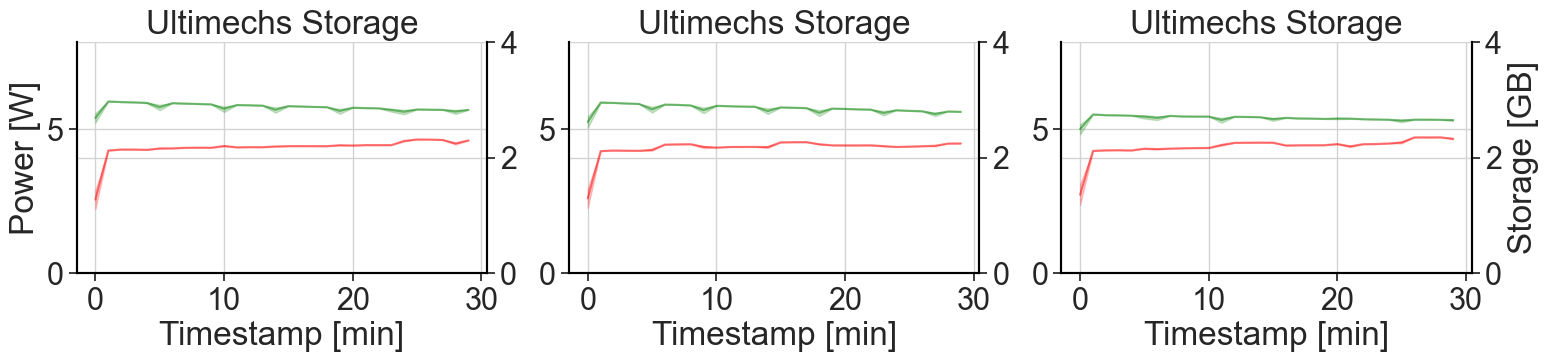

In [169]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power', 'app_pss_GB', app, app + ' Storage', 4)


## Memory

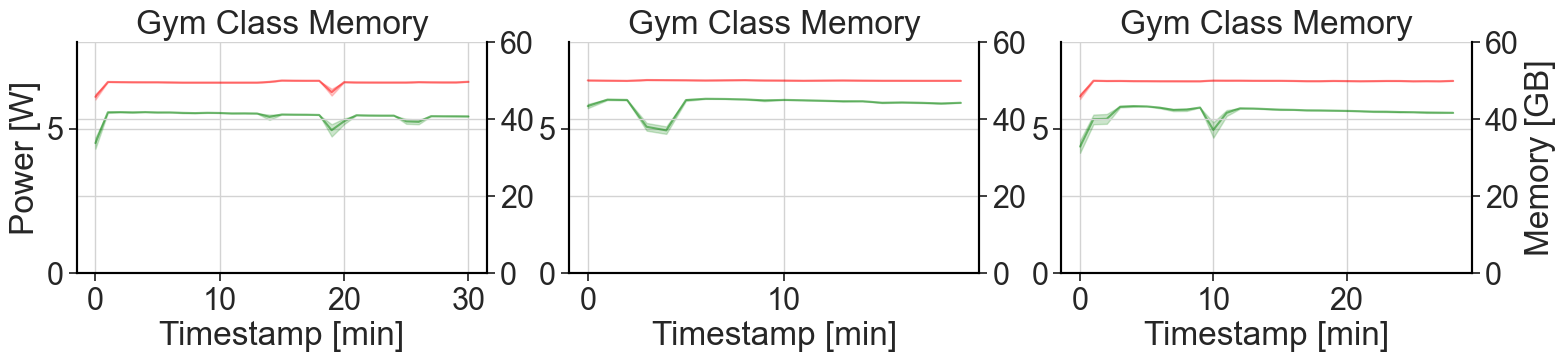

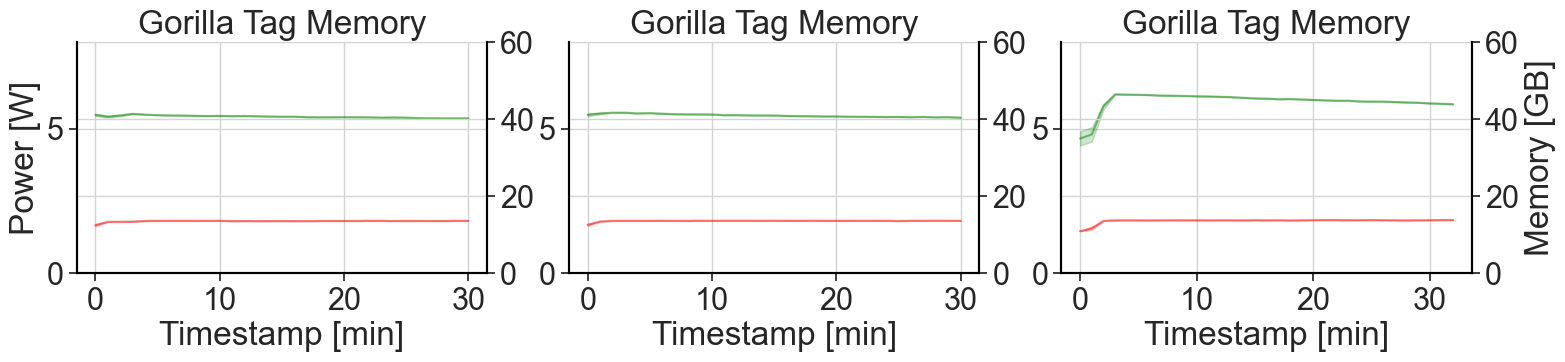

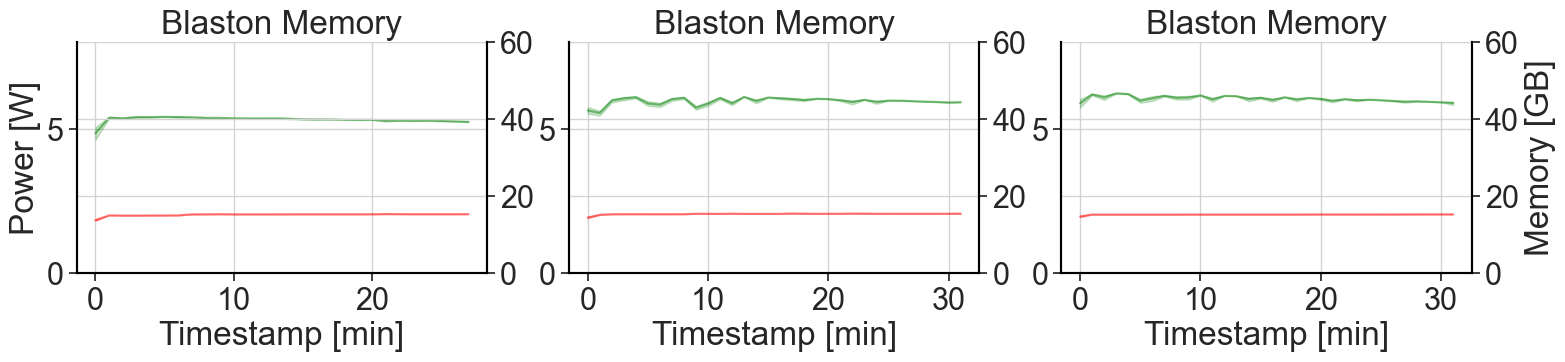

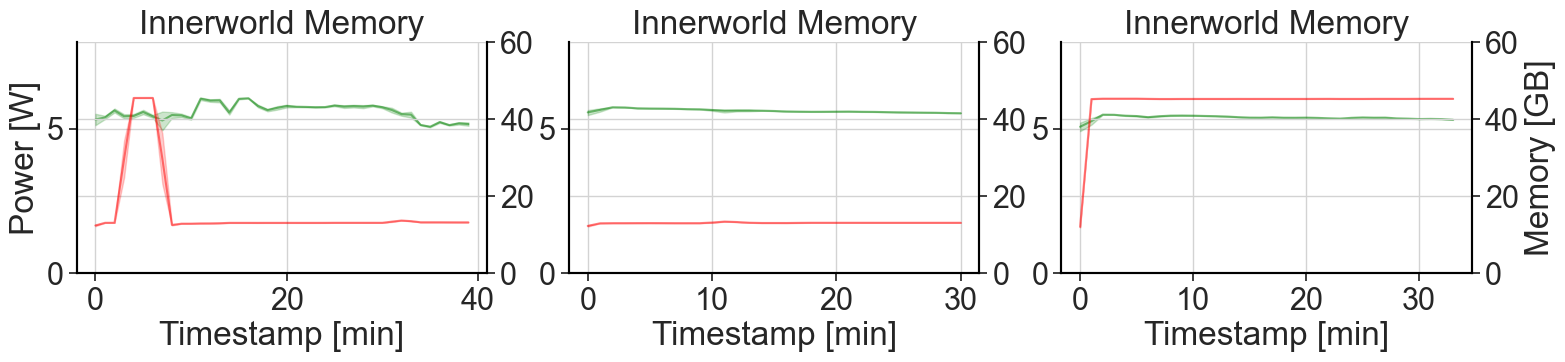

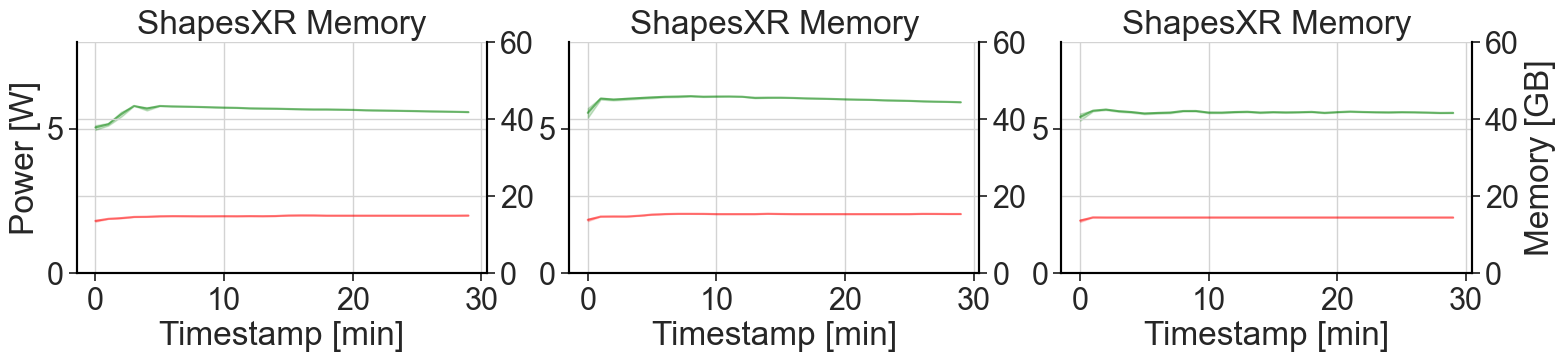

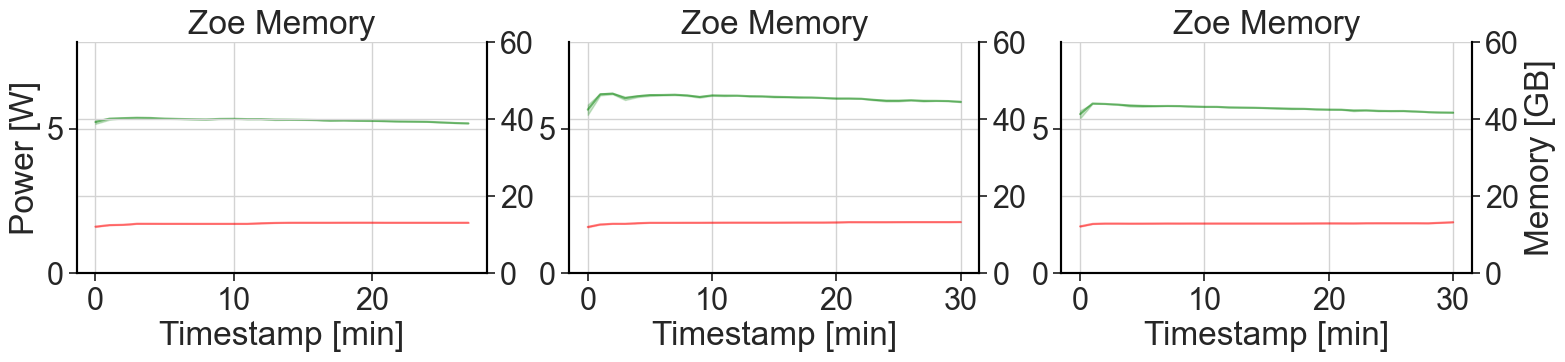

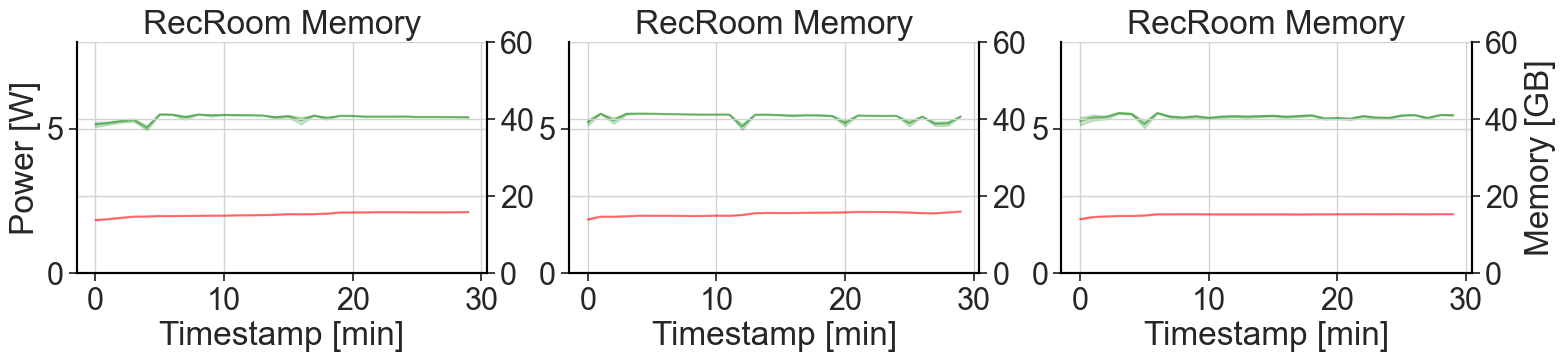

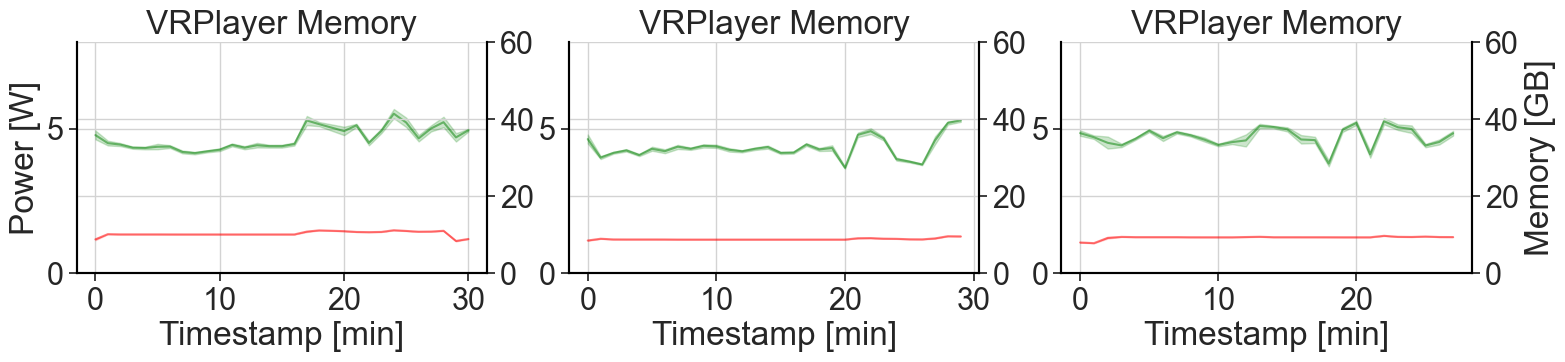

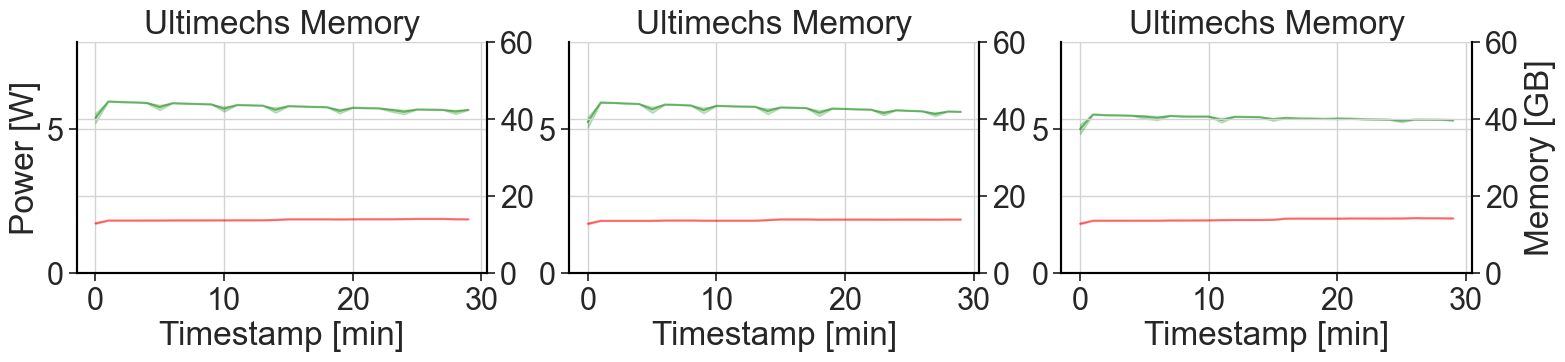

In [170]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power', 'app_vss_GB', app, app + ' Memory', 60)
